In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

### Import the Data
Let's extract the our **Titanic data** from the .csv file, create a  pandas DataFrame and look at the available indicators:

- ***Survived***: Outcome of survival (0 = No; 1 = Yes)
- ***Pclass***: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- ***Name***: Name of passenger
- ***Sex***: Sex of the passenger
- ***Age***: Age of the passenger (Some entries contain NaN)
- ***SibSp***: Number of siblings and spouses of the passenger aboard
- ***Parch***: Number of parents and children of the passenger aboard
- ***Ticket***: Ticket number of the passenger
- ***Fare***: Fare paid by the passenger
- ***Cabin***: Cabin number of the passenger (Some entries contain NaN)
- ***Embarked***: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [2]:
df = pd.read_csv('titanic_dataset.csv')

### Shape of data

In [3]:
df.shape

(891, 12)

In [4]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### **TRAINING DATA PRE-PROCESSING**
The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.   

As such, data pre-processing addresses:
- Assumptions about data shape
- Incorrect data types
- Outliers or errors
- Missing values
- Categorical variables

#### Take info of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Missing Data**  
    From the entry totals above, there appears to be missing data.  A heatmap will help better visualize what features as missing the most information.

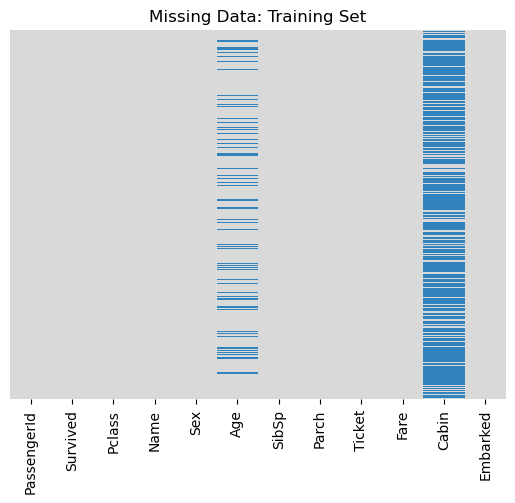

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

The 'Age' variable is missing roughly 20% of its data. This proportion is likely small enough for reasonable replacements using some form of imputation as well (using the knowledge of the other columns to fill in reasonable values).
However, too much data from the 'Cabin' column is missing to do anything useful with it at a basic level. This column may need to be dropped from the data set altogether or change to another feature such as 'Cabin Known: 1 or 0'.  

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However, we can be smarter about this and check the average age by passenger class.


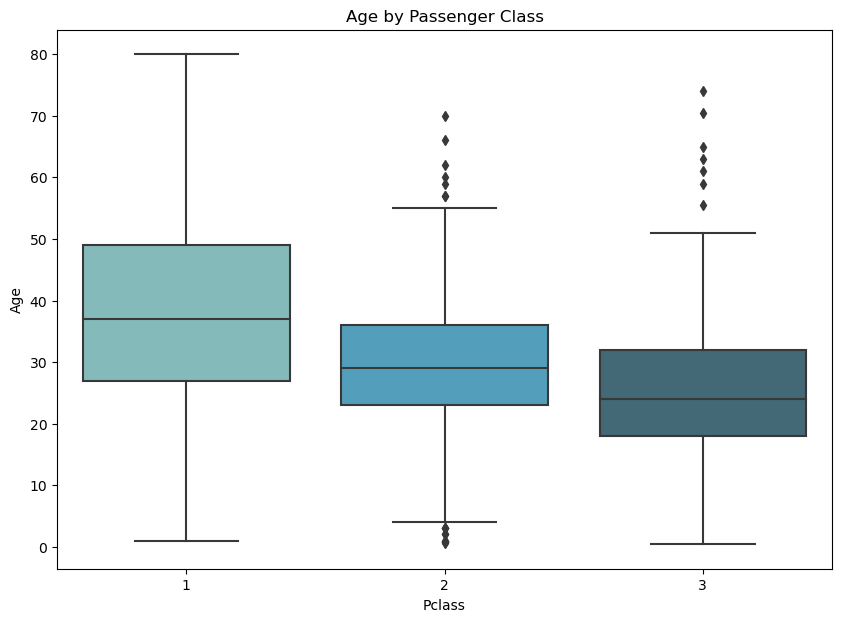

In [7]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

Naturally, the wealthier passengers in the higher classes tend to be older . We'll use these average age values to impute based on Pclass for Age.


In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [9]:
# Apply the function to the Age column
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)


The Cabin column has too many missing values to do anything useful with, so it would be best to remove it from the data frame altogether.

In [10]:
df.drop('Cabin',axis=1,inplace=True)

#### Let's visculize one time more with heatmap

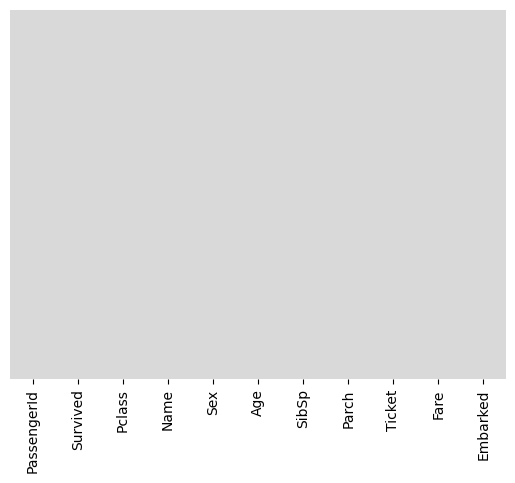

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20c_r')
plt.show()

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Since there is only two missing value in Embarked, that observation can just be removed.

In [13]:
df.dropna(inplace=True)

Name and Ticket can be removed from the dataset as these features do not provide additional information about a passenger's liklihood of survival.    

The remaining non-null objects, Sex and Embarked, will need to be specified as categories for better analysis results downstream.  

In [14]:
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
# one more way is df.drop(['Name','Ticket'],axis=1,inplace=True)

<b> Convert object into categorical data</b>

In [15]:
objects = ['Sex','Embarked']
for col in objects:
    df[col] = df[col].astype('category')

In [16]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


** *** ***
<b> Check info one more time </b>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Sex          889 non-null    category
 4   Age          889 non-null    float64 
 5   SibSp        889 non-null    int64   
 6   Parch        889 non-null    int64   
 7   Fare         889 non-null    float64 
 8   Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5)
memory usage: 57.5 KB


**Numeric Features**

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId can be removed from the dataset because it does not add any useful information in predicting a passenger's survival.  The remaining variables are the correct data type.

In [19]:
df.drop("PassengerId",axis=1,inplace=True)

# Visculization

### Distribution Plot

** **
<a id = "Distribution"></a>
## 2. Distribution plots
Distribution of data is the foremost thing that we need to understand while analysing the data. Here, we will see how seaborn helps us in understanding the distribution of our data.

<a id = "distplot"></a>
### 2.1. distplot
The `distplot()` function provides the most convenient way to take a quick look at univariate distribution. This function will plot a `histogram` that fits the **kernel density estimation(KDE)** of the data.

Now let's plot the histogram of **Number of parents and children of the passenger aboard(parch)**.


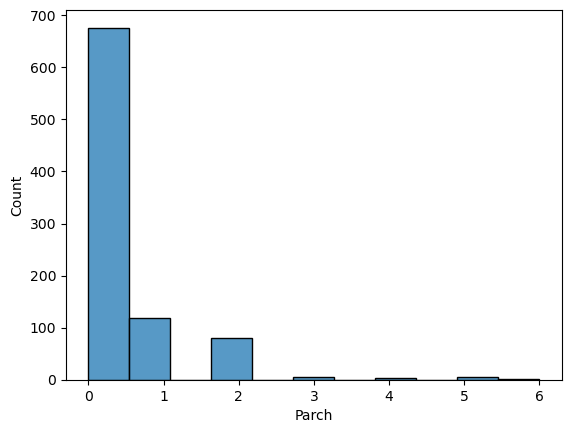

In [20]:
sns.histplot(df['Parch'])
plt.show()

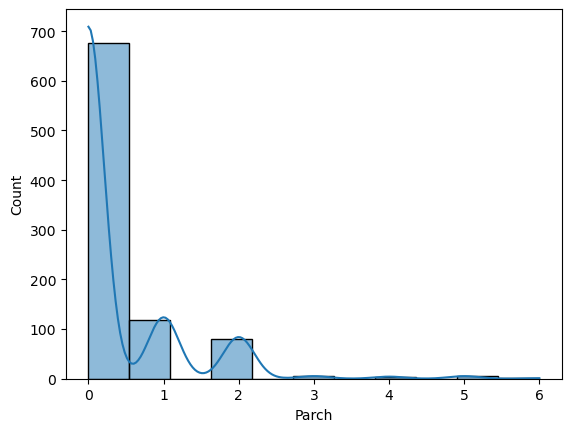

In [21]:
sns.histplot(df['Parch'],kde=True)
plt.show()

As we can see, most passengers don't have neither parents nor children aboard.
<a id = "kdeplot"></a>
### 2.2. kdeplot
***Kernel Density Estimation (KDE)*** is a way to estimate the probability density function of a continuous random variable. It is used for ***non-parametric*** analysis. Setting the `hist` flag to False in `distplot` will yield the KDE plot. For bivariate distribution, we can plot a kde by using `jointplot()`. Pass value `‘kde’` to the parameter `kind` to plot kernel plot.

**Note:** `distplot(data)` is used to visualize the ***parametric distribution*** of data. It plot both KDE and histogram on the same figure.

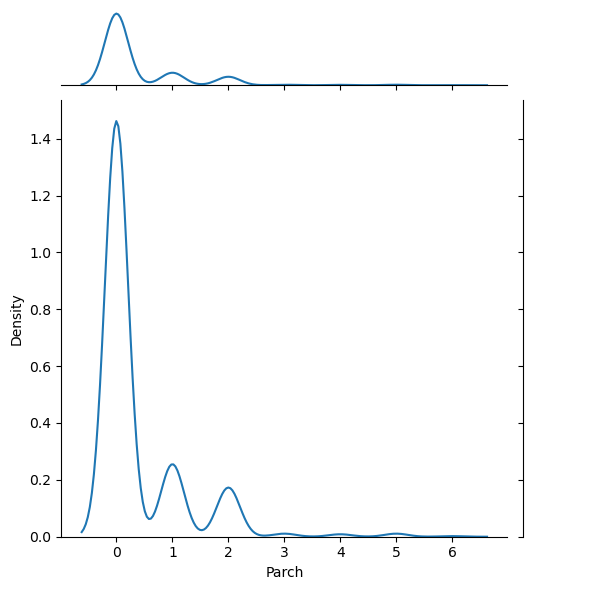

In [22]:
sns.jointplot(df['Parch'],kind='kde')
plt.show()

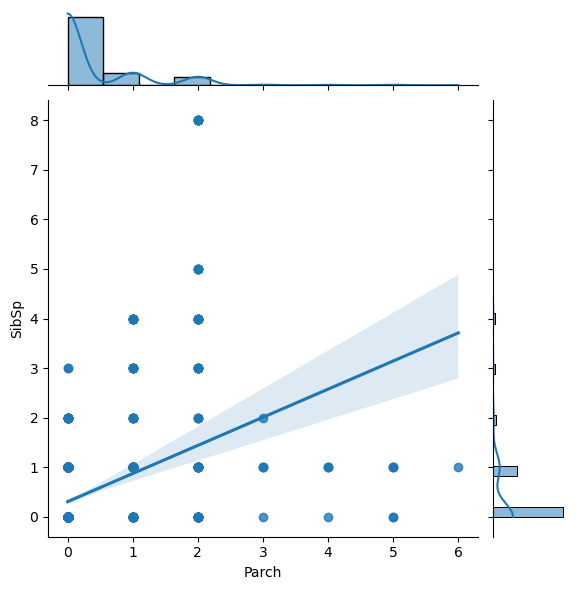

In [23]:
sns.jointplot(x=df['Parch'],y=df['SibSp'],kind='reg')
plt.show()

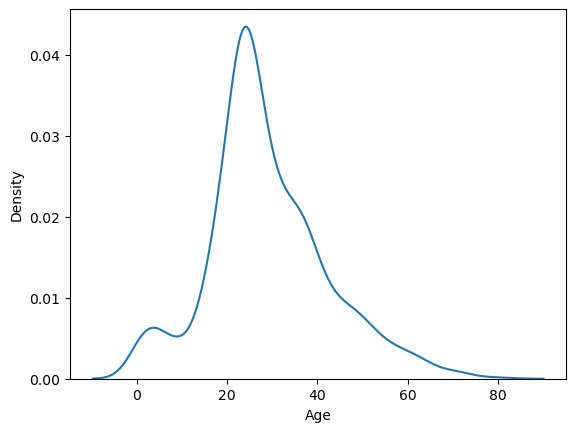

In [24]:
sns.distplot(df['Age'], hist=False)
plt.show()

As we can see that most of the passenger has the age between 20 to 40

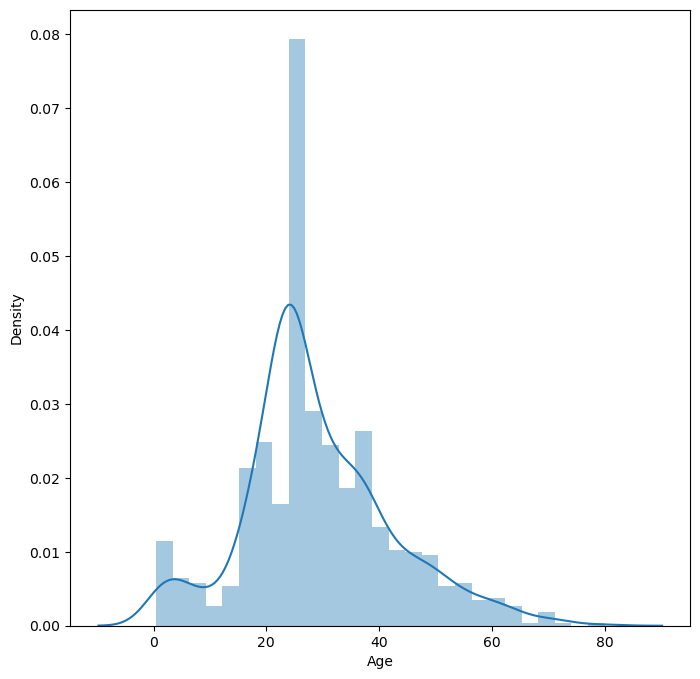

In [25]:
plt.figure(figsize=(8,8))
sns.distplot(df['Age'])
plt.show()


** **
<a id = "Relational"></a>
## 3. Relational plots

<a id = "relplot"></a>
### 3.1. relplot
Figure-level interface for drawing relational plots onto a FacetGrid.

The function `relplot()` is named that way because it is designed to visualize many different statistical relationships. While scatter plots are a highly effective way of doing this, relationships where one variable represents a measure of time are better represented by a line. The `relplot()` function has a convenient `kind` parameter to let you easily switch to this alternate representation.


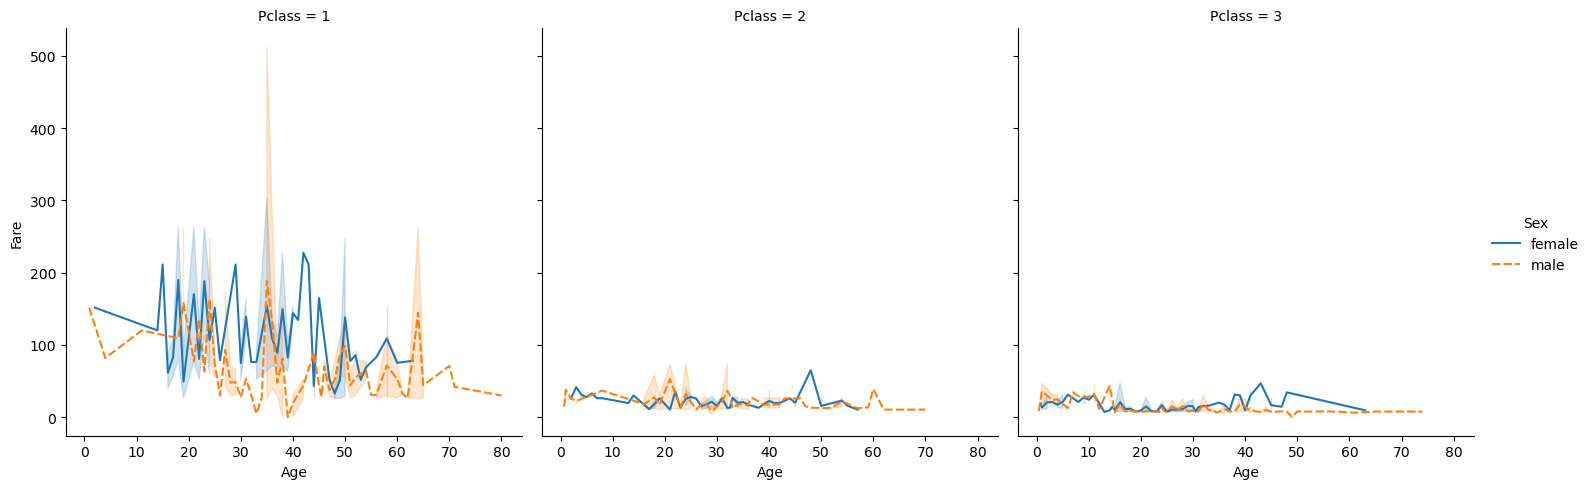

In [26]:
sns.relplot(x=df['Age'],y=df['Fare'],col=df['Pclass'],hue=df['Sex'],style=df['Sex'],kind='line',data=df)
plt.show()

<a id = "scatterplot"></a>
### 3.2. scatterplot
**Scatter plot** is the most convenient way to visualize the distribution where each observation is represented in two -dimensional plot via x and y axi

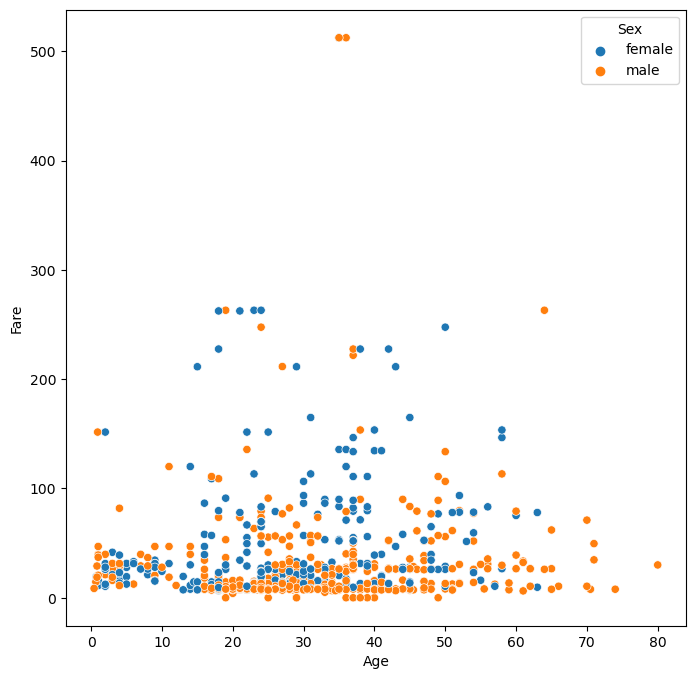

In [27]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age',y='Fare',hue='Sex',data=df)
plt.show()

<a id = "lineplot"></a>
### 3.3. lineplot
Draw a line plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets of the data using the `hue, size`, and `style` parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both **hue** and **style** for the same variable) can be helpful for making graphics more accessible.

The default treatment of the hue (and to a lesser extent, size) semantic, if present, depends on whether the variable is inferred to represent **“numeric” or “categorical”** data. In particular, numeric variables are represented with a sequential colormap by default, and the legend entries show regular **“ticks”** with values that may or may not exist in the data. This behavior can be controlled through various parameters.

By default, the plot aggregates over multiple `y` values at each value of `x` and shows an estimate of the central tendency and a confidence interval for that estimate.


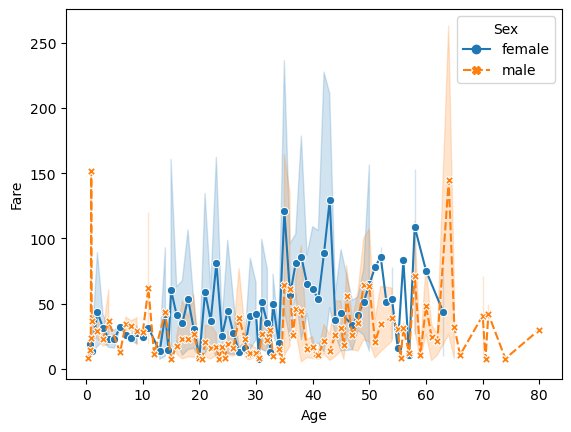

In [28]:
sns.lineplot(x='Age',y='Fare',hue='Sex',style='Sex',legend=True,markers=True,data=df)
plt.show()

** **
<a id = "features"></a>
## 4. Categorical Plot
When one or both the variables under study are categorical, we use plots like `striplot(), swarmplot(), etc,`. Seaborn provides interface to do so.
<a id = "barplot"></a>
### 4.1. barplot
***The `barplot()` shows the relation between a categorical variable and a continuous variable.*** The data is represented in rectangular bars where the length the bar represents the proportion of the data in that category.
**Bar plot** represents the estimate of ***central tendency.***

**Note:** don't confuse **Bar plot** and **Histogram**. Please back to `2.1. distplot` section to see the difference.


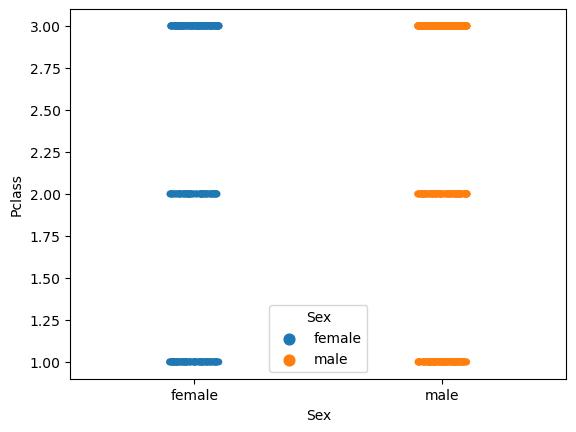

In [29]:
sns.stripplot(x=df['Sex'],y=df['Pclass'],hue=df['Sex'])
plt.show()

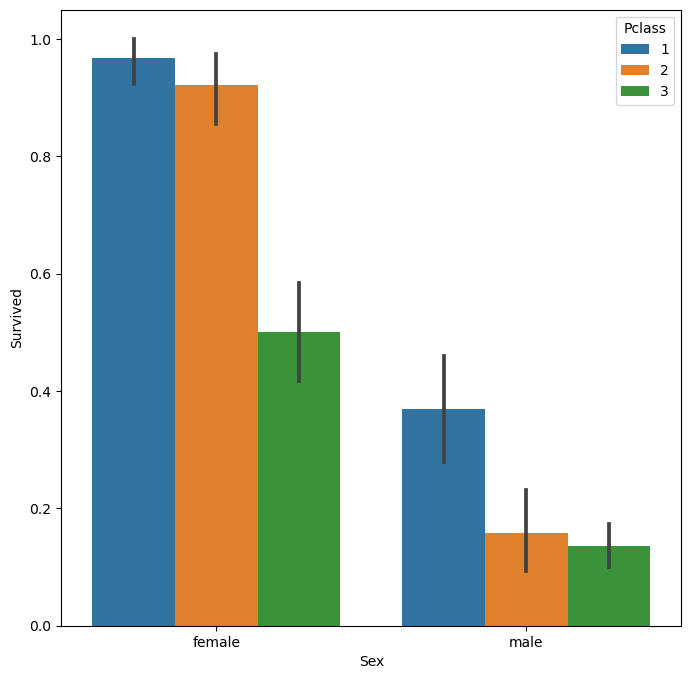

In [30]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)
plt.show()

**As we can see, More women survived than men.**
<a id = "stripplot"></a>
### 4.2. stripplot
`stripplot()` is used when one of the variable under study is categorical. It represents the data in sorted order along any one of the axis.

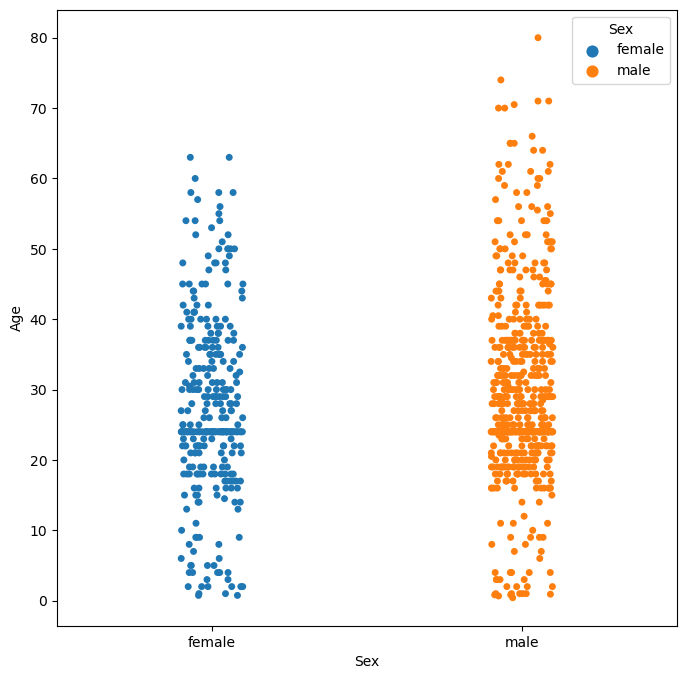

In [31]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Sex", y="Age",hue='Sex', data=df)
plt.show()

To avoid the overlapping of the points, we can use the `jitter` to add some random noise to the data. This parameter will adjust the positions along the categorical axis. But Another option which can be used as an alternate to `‘Jitter’` is function `swarmplot()`.

<a id = "swarmplot"></a>
### 4.3. swarmplot
This function positions each point of scatter plot on the categorical axis and thereby avoids overlapping points:

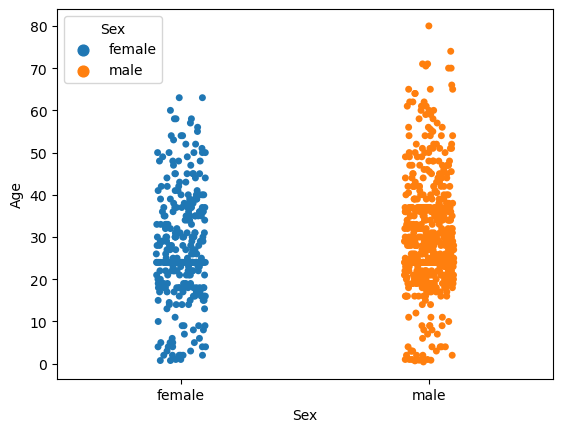

In [32]:
sns.stripplot(df['Sex'],y=df['Age'],hue=df["Sex"],jitter=True)
plt.show()

D:\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


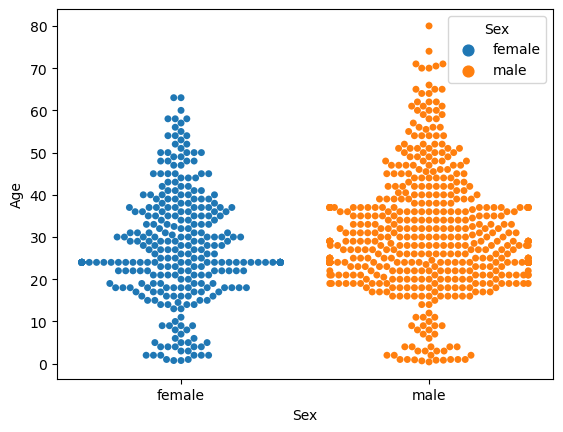

In [33]:
sns.swarmplot(df['Sex'],y=df['Age'],hue=df['Sex'])
plt.show()

**We can said that more passengers are approximally between 18 and 40 years old.**
<a id = "boxplot"></a>
### 4.4. boxplot
**Boxplot** is a convenient way to visualize the distribution of data through their quartiles. Box plots usually have vertical lines extending from the boxes which are termed as **whiskers**. These whiskers indicate variability outside the upper and lower quartiles, hence Box Plots are also termed as **box-and-whisker plot** and **box-and-whisker diagram**. Any Outliers in the data are plotted as individual points.


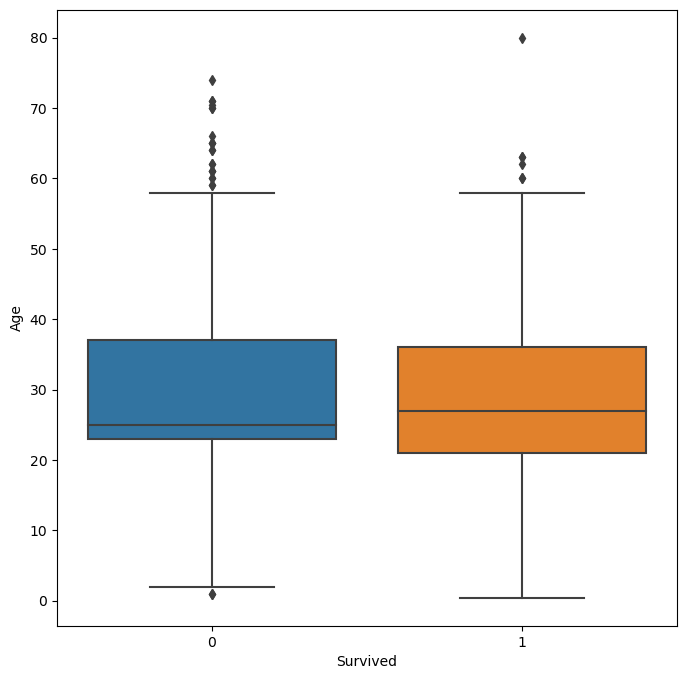

In [34]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived", y="Age", data=df)
plt.show()

**We have some outliers for passengers survery through their age.**
<a id = "violinplot"></a>
### 4.5. violinplot
**Violin Plots** are a combination of the **box plot** with the **kernel density estimates**. So, these plots are easier to analyze and understand the distribution of the data.

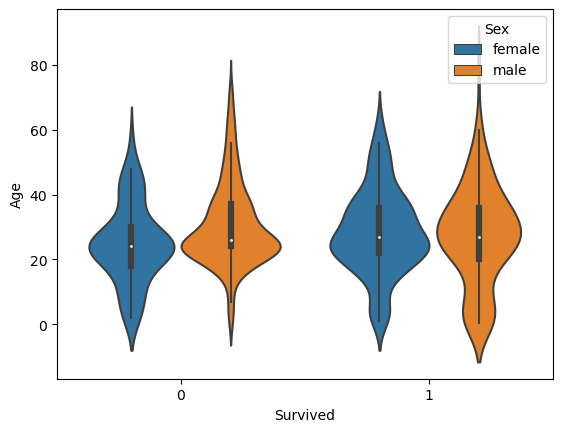

In [35]:
sns.violinplot(x="Survived", y="Age", hue='Sex', data=df)
plt.show()

The quartile and whisker values from the boxplot are shown inside the violin. As the violin plot uses KDE, the wider portion of violin indicates the higher density and narrow region represents relatively lower density. The Inter-Quartile range in boxplot and higher density portion in kde fall in the same region of each category of violin plot.

<a id = "countplot"></a>
### 4.6. countplot
A special case in **barplot** is to show the no of observations in each category rather than computing a statistic for a second variable. For this, we use `countplot()`.


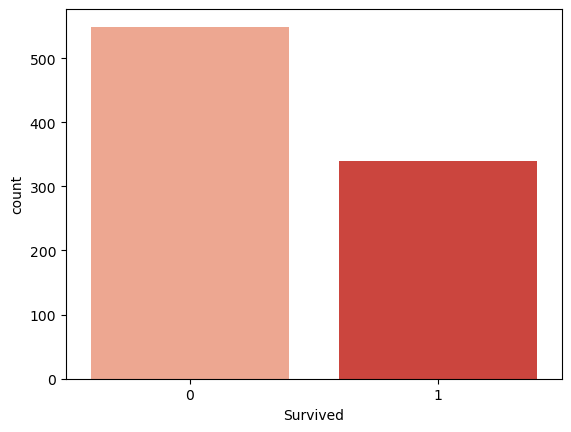

In [36]:
sns.countplot(x=df['Survived'],palette='Reds')
plt.show()

<a id = "pointplot"></a>
### 4.7. pointplot
**Point plots** serve same as **bar plots** but in a different style. Rather than the full bar, the value of the estimate is represented by the point at a certain height on the other axis.

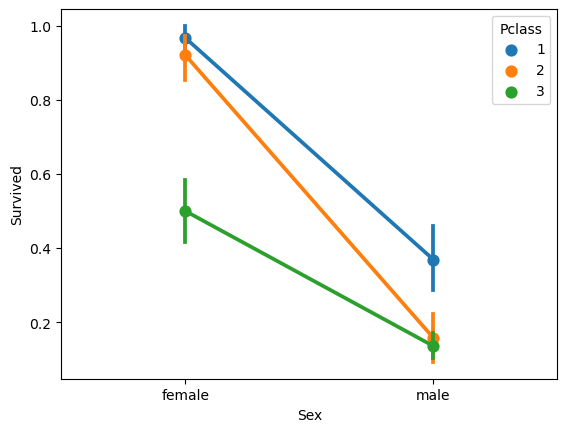

In [37]:
sns.pointplot(df['Sex'],y=df['Survived'],hue=df['Pclass'])
plt.show()

**We can see the average number of survivals of male and female in each class. From the plot we can understand that more number of females survived than males. In both males and females more number of survivals are from first
class.**


**Plot says that, the number of passengers in the third class are higher than first and second class.**

[Go back to the Table of Contents](#table_of_contents)
** **
<a id = "Regression"></a>
## 5. Regression plots
Most of the times, we use datasets that contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. This can be done through the ***regression lines***.

While building the regression models, we often check for ***multicollinearity***, where we had to see the correlation between all the combinations of continuous variables and will take necessary action to remove multicollinearity if exists.

There are two main functions in Seaborn to visualize a linear relationship determined through regression. These functions are `regplot()` and `lmplot()`.
<a id = "lmplot"></a>
### 5.1. lmplot
**lmplot** has data as a required parameter and the x and y variables must be specified as strings. This data form at is called ***“long -form ”*** data

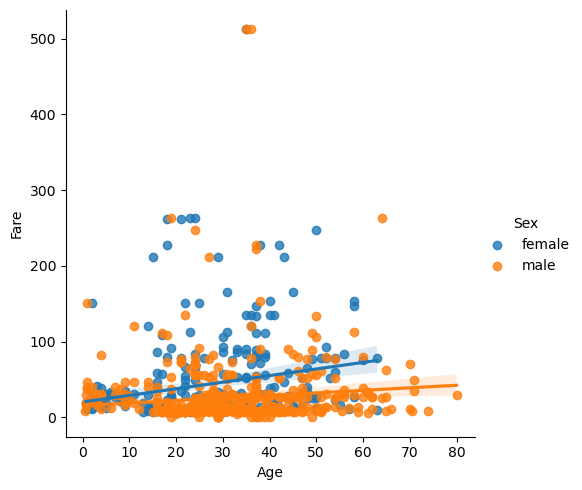

In [38]:
sns.lmplot(x='Age',y='Fare',hue='Sex',data=df)
plt.show()

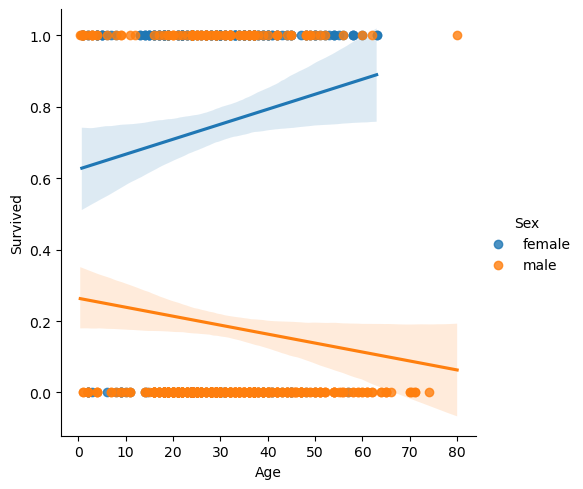

In [39]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=df)
plt.show()

<a id = "regplot"></a>
### 5.2. regplot
**regplot** accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame.`m


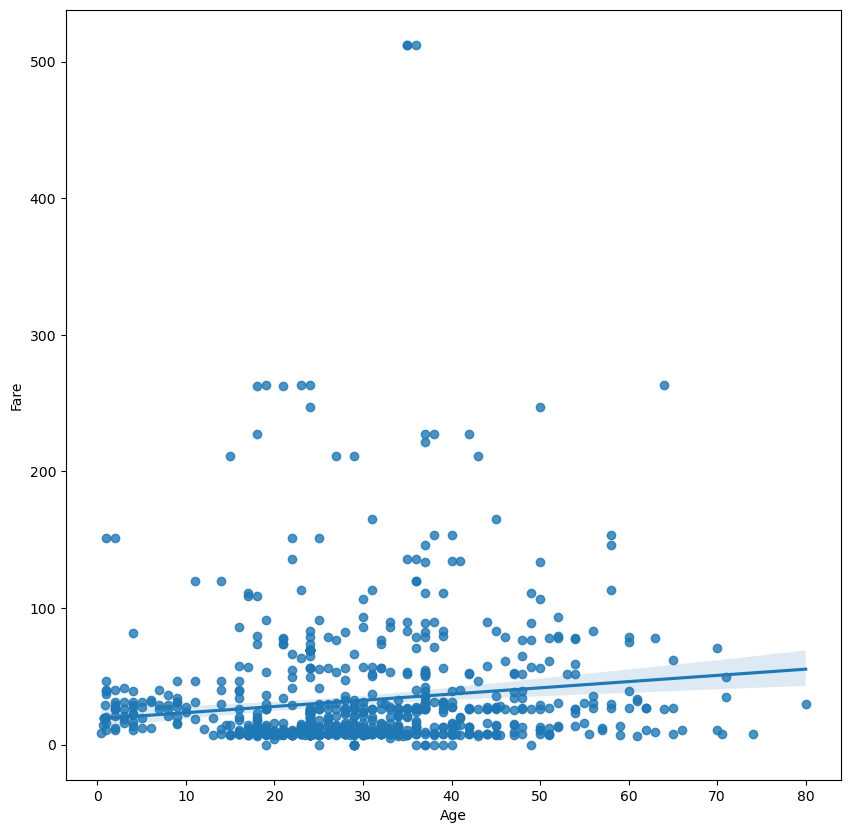

In [40]:
plt.subplots(figsize=(10, 10))
sns.regplot(x="Age", y="Fare", data=df)
plt.show()

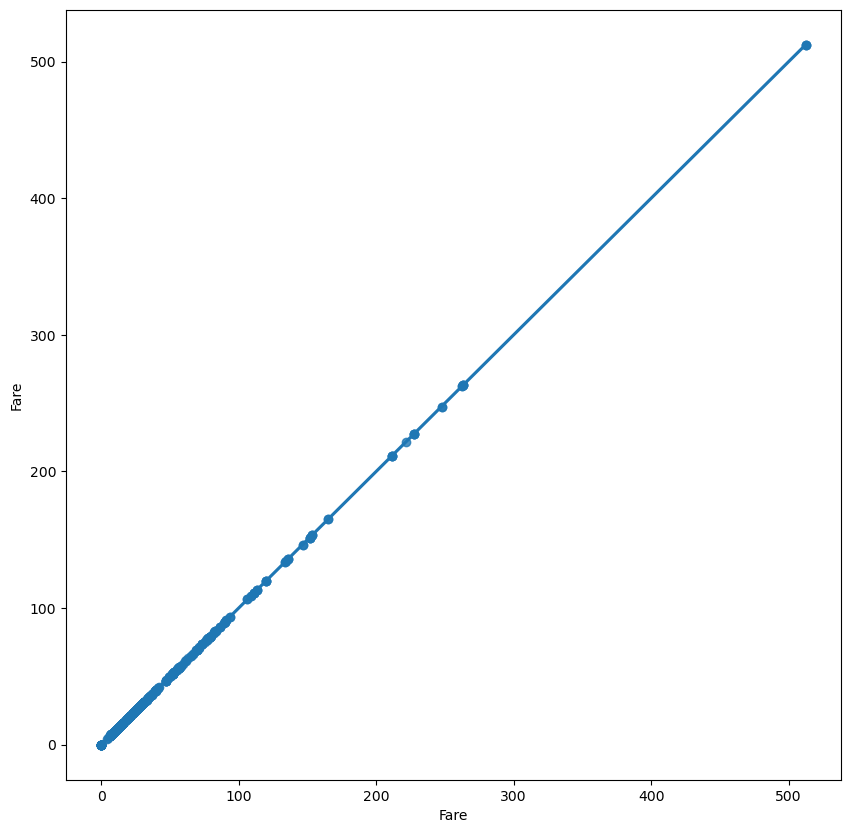

In [41]:
plt.subplots(figsize=(10, 10))
sns.regplot(x="Fare", y="Fare", data=df)
plt.show()


** **
<a id = "Matrix"></a>
## 6. Matrix plots

<a id = "heatmap"></a>
### 6.1. heatmap

Visualizing data with **heatmaps** is a great way to do exploratory data analysis, when you have a data set with multiple variables. Heatmaps can reveal general pattern in the dataset, instantly. And it is very easy to make beautiful heatmaps with Seaborn library in Python.

Now let's plot the correlation matrix of our data with a heatmap.

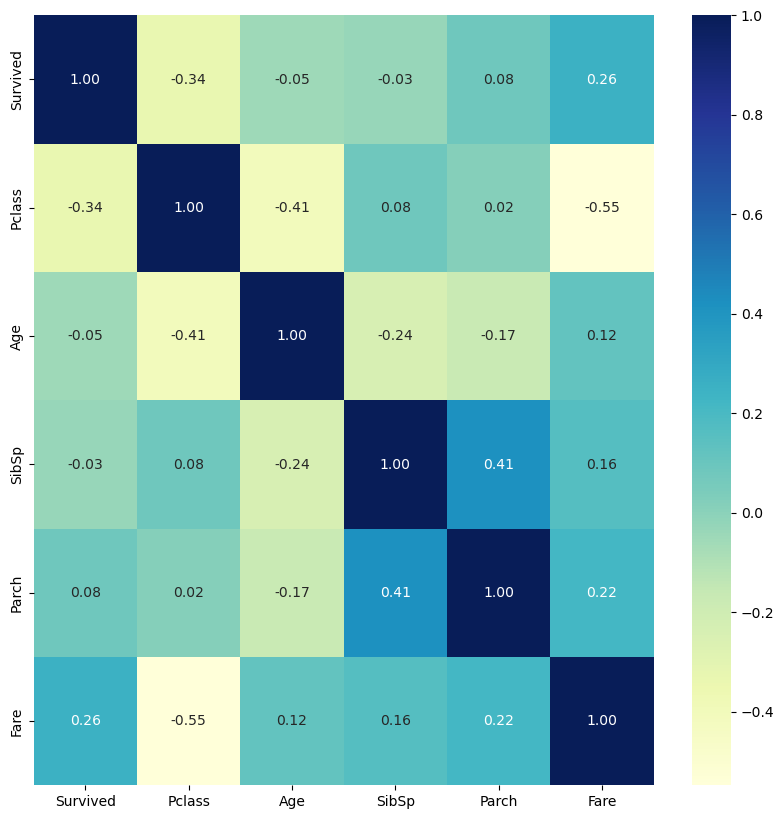

In [42]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

**We note that correlations beteewn variables are weak.**

*** ***
<a id = "features"></a>
## 7. Multi-plot grids

<a id = "Facet"></a>
### 7.1. Facet grids
A useful approach to explore medium-dimensional data, is by drawing multiple instances of the same plot on different subsets of your dataset. This technique is commonly called as ***“lattice”***, or ***“trellis”*** plotting, and it is related to the idea of ***“small multiples”***. To use these features, your data has to be in a Pandas DataFrame.

**Facet grid** forms a matrix of panels defined by row and column by dividing the variables. Due of panels, a single plot looks like multiple plots. It is very helpful to analyze all combinations in two discrete variables.

**FacetGrid** object takes a dataframe as input and the names of the variables that will form the row, column, or hue dimensions of the grid. The variables should be categorical and the data at each level of the variable will be used for a facet along that axis.

The advantage of using Facet is, we can input another variable into the plot. We can make many column facets and align them with the rows of the grid:

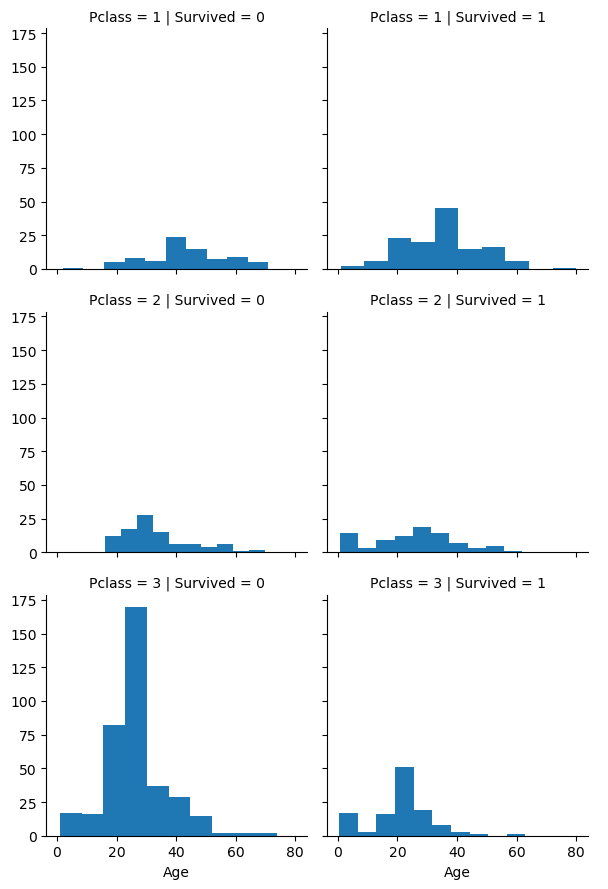

In [43]:
# initialize the FacetGrid object
g = sns.FacetGrid(df, col='Survived', row='Pclass')

g.map(plt.hist, 'Age')
g.add_legend()
plt.show()


** **

## Conclusion

This tutorial took you through the basics and various functions of Seaborn. It is specifically useful for people working on data analysis. After completing this tutorial, you are now at a moderate level of expertise from where you can take yourself to higher levels of expertise.

Stay update, practice, practice and practice to developpe data visualization skill.

**Thanks and Good luck.**

## References:
* https://cmdlinetips.com/2020/01/ especially for heatmap and clustermap.
* https://seaborn.pydata.org/
* https://seaborn.pydata.org/api.html#api-ref

# **GETTING MODEL READY**

Now that we've explored the data, it is time to get these features 'model ready'. Categorial features will need to be converted into 'dummy variables', otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [44]:
df.shape

(889, 8)

In [45]:
# Identify categorical features
df.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

**Convert categorical variables into 'dummy' or indicator variables**

In [46]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [47]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


***Add new dummy columns to data frame***

In [48]:
df = pd.concat([df,sex,embarked],axis=1)

In [49]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


***Drop unecessary columns***

In [50]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

__**Shape of Data**__

In [51]:
df.shape

(889, 9)

*** ****
>Now the train data is perfect for a machine learning algorithm:  
- all the data is numeric
- everything is concatenated together

## **OBJECTIVE 2: MACHINE LEARNING**
Next, I will feed these features into various classification algorithms to determine the best performance using a simple framework: **Split, Fit, Predict, Score It.**

## **Target Variable Splitting**
We will spilt the Full dataset into **Input** and **target** variables

Input is also called **Feature Variables**
Output referes to Target **variables**

In [52]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Survived',axis=1)
y = df['Survived']

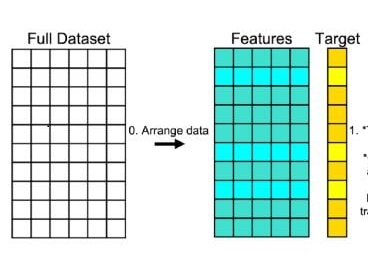

**Process Features Before Feeding**

In [53]:
from sklearn.preprocessing import StandardScaler
pre_process = StandardScaler().fit(X)
X_transform = pre_process.fit_transform(X)

In [54]:
X_transform

array([[ 0.82520863, -0.53167023,  0.43135024, ...,  0.73534203,
        -0.30794088,  0.61679395],
       [-1.57221121,  0.68023223,  0.43135024, ..., -1.35991138,
        -0.30794088, -1.62128697],
       [ 0.82520863, -0.22869462, -0.47519908, ..., -1.35991138,
        -0.30794088,  0.61679395],
       ...,
       [ 0.82520863, -0.38018243,  0.43135024, ..., -1.35991138,
        -0.30794088,  0.61679395],
       [-1.57221121, -0.22869462, -0.47519908, ...,  0.73534203,
        -0.30794088, -1.62128697],
       [ 0.82520863,  0.22576881, -0.47519908, ...,  0.73534203,
         3.24737656, -1.62128697]])

**Use X_transform and y variables to split the training data into train and test set**

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_transform,y,test_size=0.1,random_state=101)

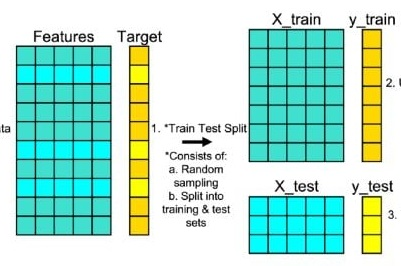

In [56]:
X_train.shape

(800, 8)

In [57]:
X_test.shape

(89, 8)

In [58]:
Y_test.shape

(89,)

In [59]:
Y_train.shape

(800,)

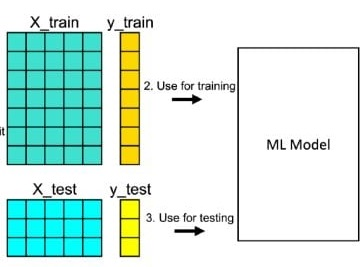

# **1. LOGISTIC REGRESSION**

## **Model Training**

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
# Create Instance
logisticModel = LogisticRegression()
# Pass training data into model
logisticModel.fit(X_train,Y_train)

LogisticRegression()

## **Model Evaluation**
**Logistic regression**

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score

In [63]:
y_pred_log = logisticModel.predict(X_test)

In [64]:
print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(Y_test, y_pred_log) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 85.39 %


***Precision and Recall***

In [65]:
log_prec = precision_score(y_true=Y_test,y_pred=y_pred_log)
log_rec = recall_score(y_true=Y_test,y_pred=y_pred_log)

In [66]:
print(f'{"*"*30}\nPrecission: {log_prec*100:.2f}%\nRecall: {log_rec*100:.2f}%\n{"*"*30}')

******************************
Precission: 82.76%
Recall: 75.00%
******************************


***Confusion Matrix***

In [67]:
lgstc_matrix = confusion_matrix(y_true=Y_test,y_pred=y_pred_log)

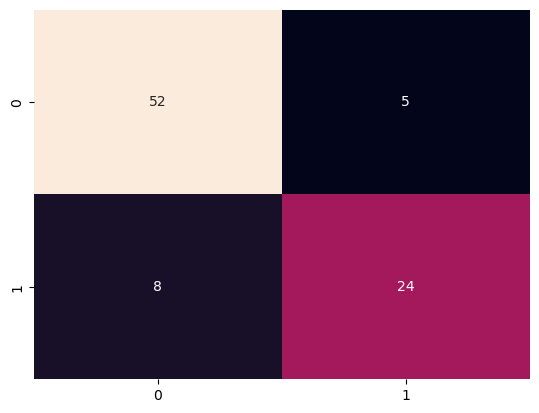

In [68]:
sns.heatmap(lgstc_matrix,annot=True,cbar=False)
plt.show()

### Improving logistic regression model

# **2. Decision Tree**

## **Model Training**

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
discionModel = DecisionTreeClassifier()

In [71]:
discionModel.fit(X_train,Y_train)

DecisionTreeClassifier()

## **Model Evalution**
**Decision Tree Classifier**

In [72]:
y_predict_des = discionModel.predict(X_test)

In [73]:
# Score It
print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(Y_test, y_predict_des) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 80.9 %


***Precision and Recal***

In [74]:
dtree_prec = precision_score(y_true=Y_test,y_pred=y_predict_des)
dtree_rec = recall_score(y_true=Y_test,y_pred=y_predict_des)

In [75]:
print(f'{"*"*30}\nPrecission: {dtree_prec*100:.2f}%\nRecall: {dtree_rec*100:.2f}%\n{"*"*30}')

******************************
Precission: 70.27%
Recall: 81.25%
******************************


***Confusion Matrix***

In [76]:
dtree_matrix = confusion_matrix(y_true=Y_test,y_pred=y_predict_des)

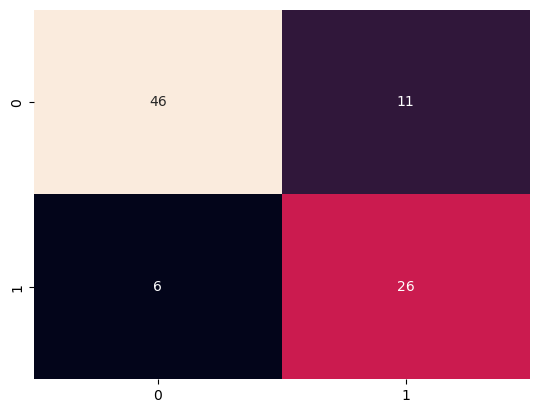

In [77]:
sns.heatmap(dtree_matrix,annot=True,cbar=False)
plt.show()

# **3. Random Forest**

## **Model Training**

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
randomModel = RandomForestClassifier()

In [80]:
randomModel.fit(X_train,Y_train)

RandomForestClassifier()

## **Model Evaluation**
**Random Forest**

In [81]:
y_pred_r = randomModel.predict(X_test)

In [82]:
print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(Y_test, y_pred_r) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 85.39 %


***Precision and Recall***

In [83]:
rfc_prec = precision_score(y_true=Y_test,y_pred=y_pred_r)
rfc_rec = recall_score(y_true=Y_test,y_pred=y_pred_r)

In [84]:
print(f'{"*"*30}\nPrecission: {rfc_prec*100:.2f}%\nRecall: {rfc_rec*100:.2f}%\n{"*"*30}')

******************************
Precission: 78.79%
Recall: 81.25%
******************************


***Confusion Matrix***

In [85]:
rf_matrix = confusion_matrix(y_true=Y_test,y_pred=y_pred_r)

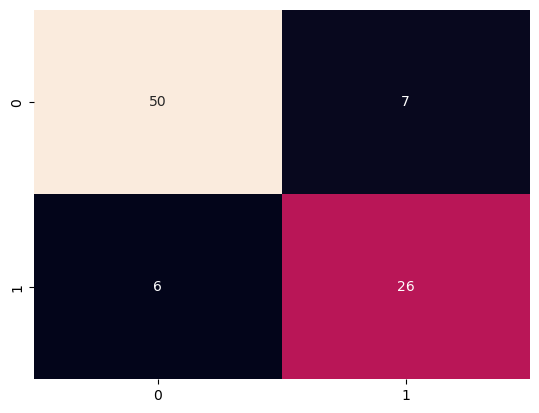

In [86]:
sns.heatmap(rf_matrix,annot=True,cbar=False)
plt.show()

# **4. Gradient Bossting Classifier**

## **Model Training**

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
gbc_model = GradientBoostingClassifier(n_estimators=30,learning_rate=0.2)

In [89]:
# Pass training data into model
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=30)

## **Model Evalution**
**Gradient Boosting**

In [90]:
y_pred_gbc = gbc_model.predict(X_test)

In [91]:
print('Gradient Boosting Classifier')
# Accuracy
print('--'*30)
gbc_accuracy = round(accuracy_score(Y_test, y_pred_gbc) * 100,2)
print('Accuracy', gbc_accuracy,'%')

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy 88.76 %


***Precision and Recall***

In [92]:
gbc_prec = precision_score(y_true=Y_test,y_pred=y_pred_gbc)
gbc_rec = recall_score(y_true=Y_test,y_pred=y_pred_gbc)

In [93]:
print(f'{"*"*30}\nPrecission: {gbc_prec*100:.2f}%\nRecall: {gbc_rec*100:.2f}%\n{"*"*30}')

******************************
Precission: 86.67%
Recall: 81.25%
******************************


***Confusion Matrix***

In [94]:
gbc_matrix = confusion_matrix(y_true=Y_test,y_pred=y_pred_gbc)

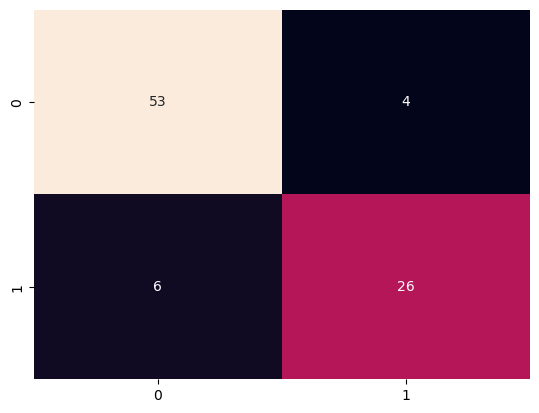

In [95]:
sns.heatmap(gbc_matrix,annot=True,cbar=False)
plt.show()

### Improving Gradient Boosting Classifier

In [96]:
# gbc_model.get_params()

In [97]:

#np.random.seed(42)
#for i in range(10,100,5):
#    print(f'Training model with {i} n_estimators')
#    model = GradientBoostingClassifier(n_estimators=i,learning_rate=0.2).fit(X_train,Y_train)
#    print(f'Model Accuracy on test: {model.score(X_test,Y_test)*100:.2f}%')


In [98]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": log_reg_accuracy,
    "Decision Tree Classifier": Dtree_accuracy,
    "Random Forest Classifier":rfc_accuracy ,
    "Gradient Boosting Classifier": gbc_accuracy
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")


Model Rankings (Greater Values are better):
1. Gradient Boosting Classifier: 88.76
2. Logistic Regression: 85.39
3. Random Forest Classifier: 85.39
4. Decision Tree Classifier: 80.9
